In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [52]:
file = pd.read_csv("coin_Bitcoin.csv")
df = pd.DataFrame(file)
df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [55]:
df["avg_open_close"] = df[["Open","Close"]].mean(axis = 1)
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,avg_open_close
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,139.491997
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,141.500000
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,127.994999
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,110.794998
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,102.000000


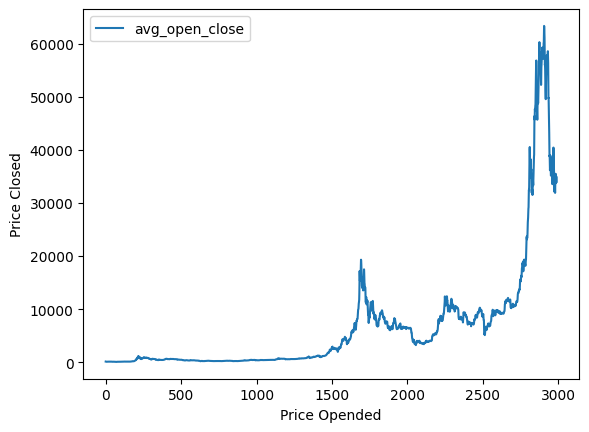

In [58]:
df[["Date","avg_open_close"]].plot()

plt.xlabel("Price Opended")
plt.ylabel("Price Closed")
plt.show()

In [62]:
df.drop('Date', inplace=True, axis=1)
df.drop('Symbol', inplace=True, axis=1)
df.drop('Name', inplace=True, axis=1)

In [63]:
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(df)
print(Kmeans.labels_)
print(Kmeans.cluster_centers_)

[0 0 0 ... 1 1 1]
[[9.11029545e+02 9.92477063e+02 9.44560527e+02 9.68183916e+02
  9.70355903e+02 7.04119020e+08 1.54967019e+10 9.69269909e+02]
 [2.89805208e+03 3.68152371e+04 3.36503657e+04 3.54150088e+04
  3.54172637e+04 5.54110708e+10 6.61350582e+11 3.54161363e+04]
 [2.21111815e+03 8.65537944e+03 8.25778610e+03 8.46537913e+03
  8.46647017e+03 1.79895927e+10 1.50227608e+11 8.46592465e+03]
 [2.89197938e+03 5.59536089e+04 5.25587352e+04 5.43506594e+04
  5.44410981e+04 6.47355377e+10 1.01633434e+12 5.43958788e+04]
 [2.37231776e+03 1.73014717e+04 1.60803431e+04 1.66636536e+04
  1.68459417e+04 2.83595774e+10 3.02150544e+11 1.67547976e+04]]


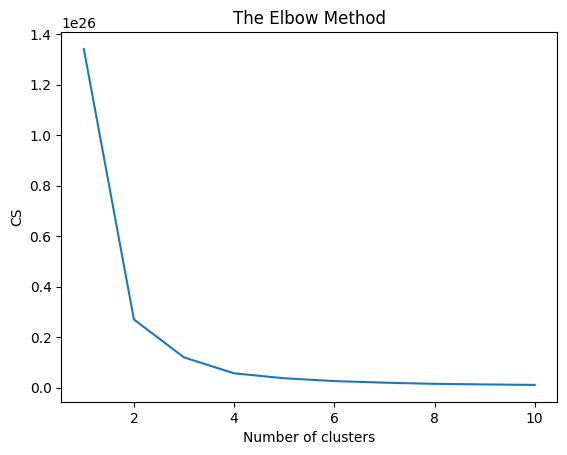

In [65]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()
